**Alumno:** César Emilio García Ávalos

**Actividad:** M5_AI1_Modelo lineal Gaussiano

In [20]:
library(readr)
library(tidyr)
library(dplyr)
library(ggplot2)
install.packages("earth")
library(earth)
install.packages("glmnet")
library(glmnet)
install.packages("pROC")
library(pROC)
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e

In [21]:
german_credit <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data")
colnames(german_credit) <- c("chk_acct","duration","credit_his","purpose","amount","saving_acct","present_emp","installment_rate","sex","other_debtor","present_resid","property","age","other_install","housing","n_credits","job","n_people","telephone","foreing","response")
german_credit$response <- german_credit$response - 1
german_credit$response <- as.factor(german_credit$response)
german_credit$response <- relevel(german_credit$response, ref = "0") #Se define que la referencia para el modelo sea la categoria 0 (tener un crédito bueno)

In [22]:
summary(german_credit)

   chk_acct            duration     credit_his          purpose         
 Length:1000        Min.   : 4.0   Length:1000        Length:1000       
 Class :character   1st Qu.:12.0   Class :character   Class :character  
 Mode  :character   Median :18.0   Mode  :character   Mode  :character  
                    Mean   :20.9                                        
                    3rd Qu.:24.0                                        
                    Max.   :72.0                                        
     amount      saving_acct        present_emp        installment_rate
 Min.   :  250   Length:1000        Length:1000        Min.   :1.000   
 1st Qu.: 1366   Class :character   Class :character   1st Qu.:2.000   
 Median : 2320   Mode  :character   Mode  :character   Median :3.000   
 Mean   : 3271                                         Mean   :2.973   
 3rd Qu.: 3972                                         3rd Qu.:4.000   
 Max.   :18424                                         Ma

In [23]:
# Ajustar el modelo logit
modelo_completo <- glm(response ~ ., data = german_credit, family = binomial(link="logit"))

# Resumen del modelo
summary(modelo_completo)


Call:
glm(formula = response ~ ., family = binomial(link = "logit"), 
    data = german_credit)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        4.005e-01  1.084e+00   0.369 0.711869    
chk_acctA12       -3.749e-01  2.179e-01  -1.720 0.085400 .  
chk_acctA13       -9.657e-01  3.692e-01  -2.616 0.008905 ** 
chk_acctA14       -1.712e+00  2.322e-01  -7.373 1.66e-13 ***
duration           2.786e-02  9.296e-03   2.997 0.002724 ** 
credit_hisA31      1.434e-01  5.489e-01   0.261 0.793921    
credit_hisA32     -5.861e-01  4.305e-01  -1.362 0.173348    
credit_hisA33     -8.532e-01  4.717e-01  -1.809 0.070470 .  
credit_hisA34     -1.436e+00  4.399e-01  -3.264 0.001099 ** 
purposeA41        -1.666e+00  3.743e-01  -4.452 8.51e-06 ***
purposeA410       -1.489e+00  7.764e-01  -1.918 0.055163 .  
purposeA42        -7.916e-01  2.610e-01  -3.033 0.002421 ** 
purposeA43        -8.916e-01  2.471e-01  -3.609 0.000308 ***
purposeA44        -5.228e-01  7.62

La variable duration es estadisticamente significativa, su Pvalue = 0.002724 menor que el nivel de significancia de 0.05, se puede rechazar la hipótesis nula de que el coeficiente asociado con "duration" es cero, lo que sugiere que "duration" tiene un efecto significativo en la probabilidad de obtener un crédito malo.

In [24]:
# Ajustar el modelo logit
modelo_reducido <- glm(response ~ . -amount, data = german_credit, family = binomial(link="logit"))

# Resumen del modelo
summary(modelo_reducido)


Call:
glm(formula = response ~ . - amount, family = binomial(link = "logit"), 
    data = german_credit)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        0.735577   1.084058   0.679 0.497429    
chk_acctA12       -0.334793   0.215930  -1.550 0.121030    
chk_acctA13       -1.010444   0.367713  -2.748 0.005998 ** 
chk_acctA14       -1.679050   0.230131  -7.296 2.96e-13 ***
duration           0.043200   0.007700   5.610 2.02e-08 ***
credit_hisA31      0.033121   0.543002   0.061 0.951362    
credit_hisA32     -0.664639   0.425722  -1.561 0.118475    
credit_hisA33     -0.929478   0.467501  -1.988 0.046792 *  
credit_hisA34     -1.511875   0.435588  -3.471 0.000519 ***
purposeA41        -1.510888   0.363500  -4.157 3.23e-05 ***
purposeA410       -1.280260   0.719681  -1.779 0.075252 .  
purposeA42        -0.791414   0.260204  -3.042 0.002354 ** 
purposeA43        -0.927151   0.246018  -3.769 0.000164 ***
purposeA44        -0.598289   0.762031 

In [25]:
# Obtener los coeficientes Beta de ambos modelos
coeficientes_completo <- coef(modelo_completo)
coeficientes_reducido <- coef(modelo_reducido)

# Crear un data frame con los coeficientes del modelo completo
tabla_coeficientes <- data.frame(
  Variable = names(coeficientes_completo)
)

# Calcular la diferencia en los coeficientes Beta entre los dos modelos
diferencia_beta <- coeficientes_completo - coeficientes_reducido

# Agregar la diferencia como una nueva columna en el dataframe
tabla_coeficientes$Diferencia <- diferencia_beta

# Imprimir la tabla
print(tabla_coeficientes)

Warning message in coeficientes_completo - coeficientes_reducido:
“longer object length is not a multiple of shorter object length”


            Variable    Diferencia
1        (Intercept) -0.3350741049
2        chk_acctA12 -0.0400605671
3        chk_acctA13  0.0447667615
4        chk_acctA14 -0.0328377117
5           duration -0.0153362752
6      credit_hisA31  0.1102566865
7      credit_hisA32  0.0785253501
8      credit_hisA33  0.0763165831
9      credit_hisA34  0.0761038860
10        purposeA41 -0.1555788483
11       purposeA410 -0.2085257702
12        purposeA42 -0.0001967473
13        purposeA43  0.0355677019
14        purposeA44  0.0755066339
15        purposeA45  0.0146498256
16        purposeA46  0.0231343195
17        purposeA48 -0.0208225248
18        purposeA49  0.0209607631
19            amount  0.3897579073
20    saving_acctA62  0.0625037110
21    saving_acctA63  0.9349652752
22    saving_acctA64 -0.4416115521
23    saving_acctA65 -0.8774343431
24    present_empA72  0.1126308995
25    present_empA73  0.6376676411
26    present_empA74 -0.5306473261
27    present_empA75 -0.4996079429
28  installment_rate

In [26]:
# Convertir las variables numéricas de caracteres a numéricas
numeric_variables <- german_credit[, c("duration", "amount", "installment_rate", "age", "n_credits", "n_people")]

# Convertir a tipo numérico
numeric_variables <- apply(numeric_variables, 2, as.numeric)

# Calcular correlaciones
correlations <- cor(numeric_variables)

# Imprimir correlaciones
correlations

,duration,amount,installment_rate,age,n_credits,n_people
duration,1.00000000,0.62498420,0.07474882,-0.03613637,-0.01128360,-0.02383448
amount,0.62498420,1.00000000,-0.27131570,0.03271642,0.02079455,0.01714215
installment_rate,0.07474882,-0.27131570,1.00000000,0.05826568,0.02166874,-0.07120694
age,-0.03613637,0.03271642,0.05826568,1.00000000,0.14925358,0.11820083
n_credits,-0.01128360,0.02079455,0.02166874,0.14925358,1.00000000,0.10966670
n_people,-0.02383448,0.01714215,-0.07120694,0.11820083,0.10966670,1.00000000


Al eliminar la variable amount del modelo, la varianza residual se ve incrementada de 895.82 a 904.28, al ser la variable amount estadísticamente significativa (Pvalue=0.003894 menor que el nivel de significancia de 0.05) y tener una correlación positiva con la variable "duration" además de una correlación negativa con la variable "installment_rate" genera sesgo el hecho de eliminarla del modelo, ademas se identifica una diferencia en los coeficientes para el modelo completo y el modelo reducido

Call: earth(formula=response~duration+amount, data=german_credit,
            glm=list(family=binomial))

GLM coefficients
                         1
(Intercept)    -1.44407777
h(12-duration) -0.19066522
h(duration-12)  0.03219546
h(2892-amount)  0.00036491
h(amount-3386) -0.00571330
h(amount-3676)  0.01190188
h(amount-4280) -0.02688005
h(amount-4380)  0.02081076

GLM (family binomial, link logit):
 nulldev  df       dev  df   devratio     AIC iters converged
 1221.73 999    1136.1 992     0.0701    1152     4         1

Earth selected 8 of 13 terms, and 2 of 2 predictors
Termination condition: Reached nk 21
Importance: duration, amount
Number of terms at each degree of interaction: 1 7 (additive model)
Earth GCV 0.1986522    RSS 192.7373    GRSq 0.05592827    RSq 0.08220333

 plotmo grid:    duration amount
                       18   2320


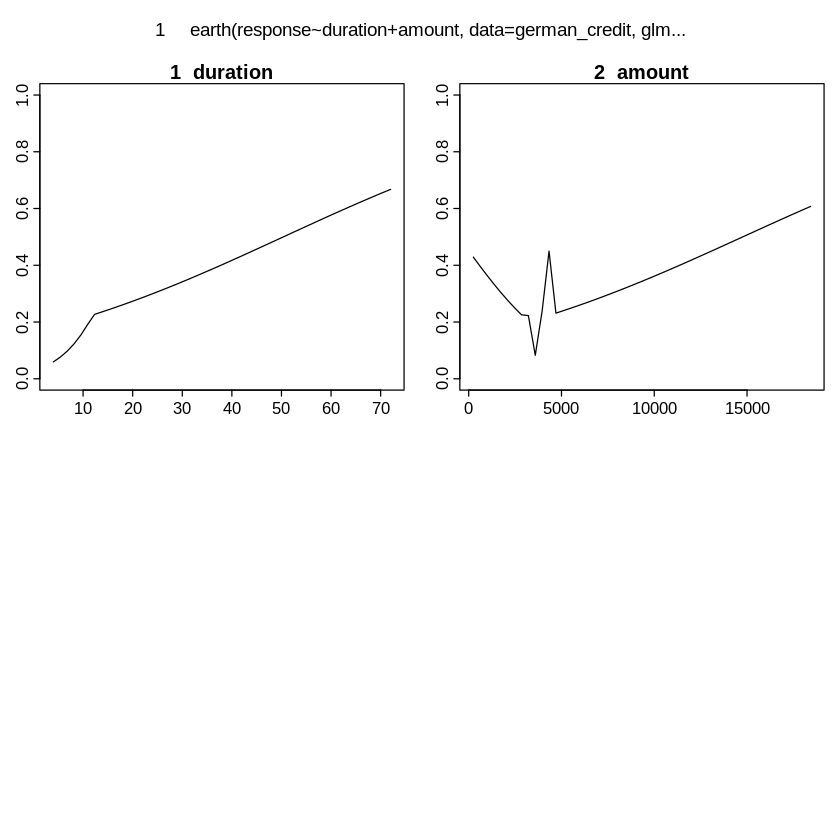

In [27]:
# Ajustar el modelo MARS para capturar no linealidades en 'duration' y 'amount'
mars_model <- earth(response ~ duration + amount, data = german_credit, glm=list(family=binomial))

# Resumen del modelo
summary(mars_model)

# Interpretar los resultados
plotmo(mars_model)

El modelo MARS ha identificado varias no linealidades en las relaciones entre duration, amount y la probabilidad de tener un crédito malo. Esto sugiere que estas relaciones no son puramente lineales y que hay cambios en la pendiente en puntos específicos (bisagras) de las variables. Duración tiene una bisagra en 12 mientras que la variable amount tiene cinco bisagras en 2892, 3386, 3676, 4280 y 4380

*h(12-duration) (-0.19066522): Este término indica que hay un cambio en la relación cuando duration es menor que 12. La función hinge h crea una "bisagra" en 12, y el coeficiente negativo sugiere que a medida que duration disminuye por debajo de 12, la probabilidad de tener un crédito malo disminuye.

*h(duration-12) (0.03219546): Este término indica que hay un cambio en la relación cuando duration es mayor que 12. La función hinge h crea una "bisagra" en 12, y el coeficiente positivo sugiere que a medida que duration aumenta por encima de 12, la probabilidad de tener un crédito malo aumenta.

*h(2892-amount) (0.00036491): Este término indica que hay un cambio en la relación cuando amount es menor que 2892. La función hinge h crea una "bisagra" en 2892, y el coeficiente positivo sugiere que a medida que amount disminuye por debajo de 2892, la probabilidad de tener un crédito malo aumenta.

*h(amount-3386) (-0.00571330): Este término indica que hay un cambio en la relación cuando amount es mayor que 3386. La función hinge h crea una "bisagra" en 3386, y el coeficiente negativo sugiere que a medida que amount aumenta por encima de 3386, la probabilidad de tener un crédito malo disminuye.

*h(amount-3676) (0.01190188): Este término indica que hay un cambio en la relación cuando amount es mayor que 3676. La función hinge h crea una "bisagra" en 3676, y el coeficiente positivo sugiere que a medida que amount aumenta por encima de 3676, la probabilidad de tener un crédito malo aumenta.

*h(amount-4280) (-0.02688005): Este término indica que hay un cambio en la relación cuando amount es mayor que 4280. La función hinge h crea una "bisagra" en 4280, y el coeficiente negativo sugiere que a medida que amount aumenta por encima de 4280, la probabilidad de tener un crédito malo disminuye.

*h(amount-4380) (0.02081076): Este término indica que hay un cambio en la relación cuando amount es mayor que 4380. La función hinge h crea una "bisagra" en 4380, y el coeficiente positivo sugiere que a medida que amount aumenta por encima de 4380, la probabilidad de tener un crédito malo aumenta.

In [28]:
# Ajustar el modelo logístico
modelo_logistico <- glm(response ~ age, data = german_credit, family = binomial)

# Crear un nuevo conjunto de datos con personas mayores de 50 años
mayores_de_50 <- german_credit[german_credit$age > 50, ]

# Predecir la probabilidad para personas mayores de 50 años
probabilidad_predicha <- predict(modelo_logistico, newdata = mayores_de_50, type = "response")

# Calcular la probabilidad estimada media
probabilidad_media <- mean(probabilidad_predicha)

# Imprimir la probabilidad estimada media
print(probabilidad_media)

[1] 0.2161461


Para evaluar si hay discriminación de género en el modelo completo, observemos los coeficientes estimados para las variables relacionadas con el género ("sex"):

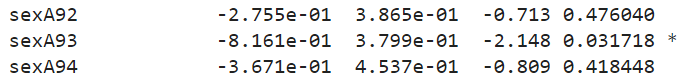

*A92 : female : divorced/separated/married: El coeficiente estimado es -0.2755, pero no es estadísticamente significativo (p = 0.476).

*A93 : male   : single: El coeficiente estimado es -0.8161, y es estadísticamente significativo con p = 0.032.

*A94 : male   : married/widowed: El coeficiente estimado es -0.3671, pero no es estadísticamente significativo (p = 0.418).

El coeficiente estimado para la categoría "sexA93" es estadísticamente significativo con un valor p de 0.032, lo que sugiere que hay una asociación significativa en el hecho de ser hombre soltero y la probabilidad de tener un crédito bueno o malo (la probabilidad de tener un credito bueno disminuye en mayor medida comparado con las categorías A92 y A94), después de controlar otras variables en el modelo, se puede decir que los hombres solteros tienen menor probabilidad de tener un crédito bueno.

In [29]:
# Preparar los datos para el modelo
x <- model.matrix(response ~ ., german_credit)[,-1]  # Eliminar el intercepto
y <- german_credit$response

In [30]:
# Ajustar el modelo Ridge con validación cruzada
set.seed(123)  # Para reproducibilidad
ridge_model <- cv.glmnet(x, y, family = "binomial", alpha = 0)

# Obtener el mejor lambda
best_lambda <- ridge_model$lambda.min
best_lambda

[1] 0.02833877

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(german_credit$response, ridge_predictions):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



Area under the curve: 0.8338

Area under the curve: 0.831

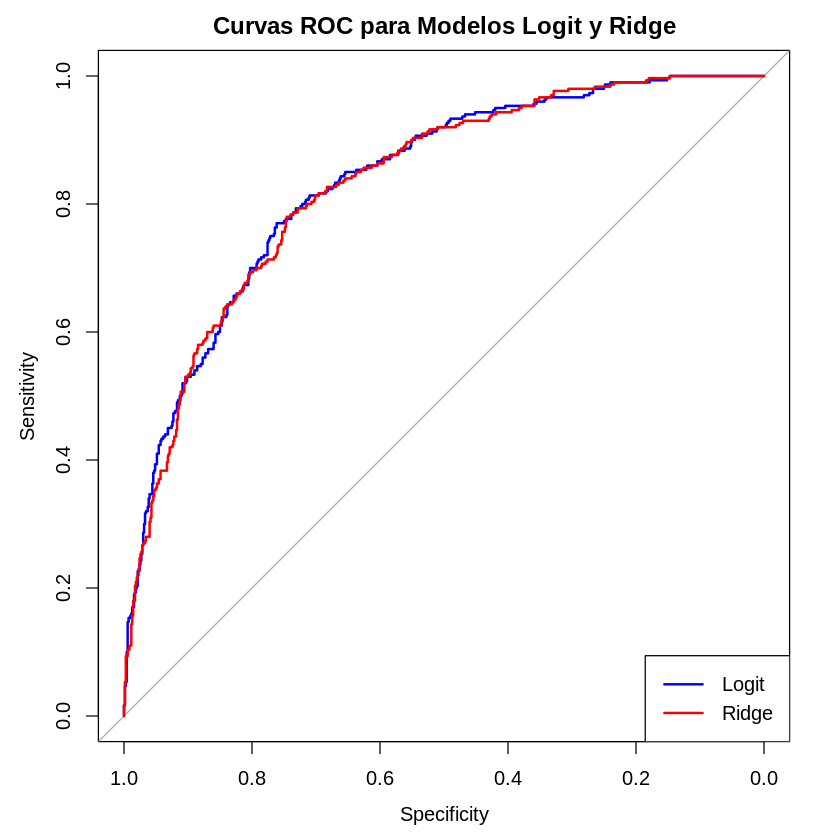

In [32]:
# Predicciones del modelo logit
logit_predictions <- predict(modelo_completo, german_credit, type = "response")

# Predicciones del modelo Ridge
ridge_predictions <- predict(ridge_model, newx = x, s = best_lambda, type = "response")

# Calcular las curvas ROC
roc_logit <- roc(german_credit$response, logit_predictions)
roc_ridge <- roc(german_credit$response, ridge_predictions)

# Comparar las curvas ROC
plot(roc_logit, col = "blue", main = "Curvas ROC para Modelos Logit y Ridge")
plot(roc_ridge, col = "red", add = TRUE)
legend("bottomright", legend = c("Logit", "Ridge"), col = c("blue", "red"), lwd = 2)

# AUC de los modelos
auc_logit <- auc(roc_logit)
auc_ridge <- auc(roc_ridge)
auc_logit
auc_ridge

Ambos modelos tienen valores de AUC muy similares, lo que sugiere que ambos tienen un rendimiento comparativamente bueno en términos de discriminación entre créditos buenos y malos:
Logit (AUC = 0.8338)
Ridge (AUC = 0.8310)
La diferencia en AUC es mínima (aproximadamente 0.003), lo que indica que ambos modelos tienen un rendimiento casi equivalente.
Conclusión
*El modelo logit: Tiene un AUC ligeramente mayor, lo que indica que, en este caso específico, podría tener una capacidad de discriminación marginalmente mejor que el modelo Ridge.
*El modelo Ridge: Aunque tiene un AUC ligeramente menor, el Ridge puede ser preferible en situaciones donde se desea reducir el sobreajuste y mejorar la generalización, especialmente en presencia de multicolinealidad entre los predictores.